<a href="https://colab.research.google.com/github/sharon-raj-1718/cifar_10_various-cnn-_models-_with_GUI/blob/main/batch_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

170500096/170498071 [==============================] - 2s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [2]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history5=model5.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))


Epoch 1/50
1563/1563 [==============================] - 47s 9ms/step - loss: 1.5867 - accuracy: 0.4505 - val_loss: 1.0672 - val_accuracy: 0.6189
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0607 - accuracy: 0.6274 - val_loss: 0.8512 - val_accuracy: 0.6974
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8893 - accuracy: 0.6911 - val_loss: 0.7679 - val_accuracy: 0.7309
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7899 - accuracy: 0.7261 - val_loss: 0.6446 - val_accuracy: 0.7822
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7170 - accuracy: 0.7531 - val_loss: 0.6403 - val_accuracy: 0.7779
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6555 - accuracy: 0.7763 - val_loss: 0.5723 - val_accuracy: 0.8056
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6088 - accuracy: 0.7941 - val_loss: 0.5358 - val_ac

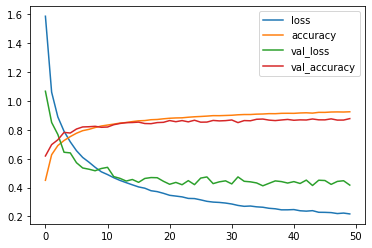

In [5]:
import pandas as pd
pd.DataFrame(history5.history).plot()

In [6]:
evaluation = model5.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8776
Test Accuracy: 0.8776000142097473


In [7]:
model5.save("cifar10_batch normalization_model.h5")